In [36]:
import matplotlib.pyplot as plt
import pymc3 as pm
from IPython.display import Markdown as md
import arviz as az
from scipy import stats
from scipy.special import expit as logistic
import seaborn as sns
from matplotlib import rcParams
#%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [1]:
from nilearn import datasets

#dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-1mm", symmetric_split=True)
dataset_ho = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-1mm", symmetric_split = True)
dataset_ho_sc = datasets.fetch_atlas_harvard_oxford(atlas_name = "sub-maxprob-thr25-1mm", symmetric_split = True)

#dataset_ju = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
#dataset_de  = datasets.fetch_atlas_destrieux_2009()

atlas_ho_filename = dataset_ho.filename
#atlas_ju_filename = dataset_ju.filename

print(f"Atlas ROIs are located at: {atlas_ho_filename}")
#print(f"Atlas ROIs are located at: {atlas_ju_filename}")


Dataset created in /root/nilearn_data/fsl



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/5aa890c5dcc33124b041848dbbf4c494/HarvardOxford.tgz..... done.


Atlas ROIs are located at: /root/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cortl-maxprob-thr25-1mm.nii.gz


/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


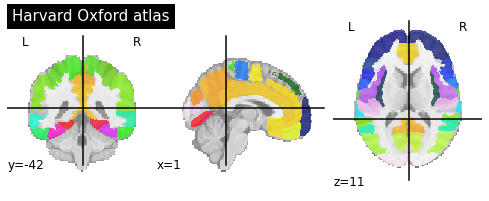

In [2]:
from nilearn import plotting

plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas")

# plotting the results - ALL

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


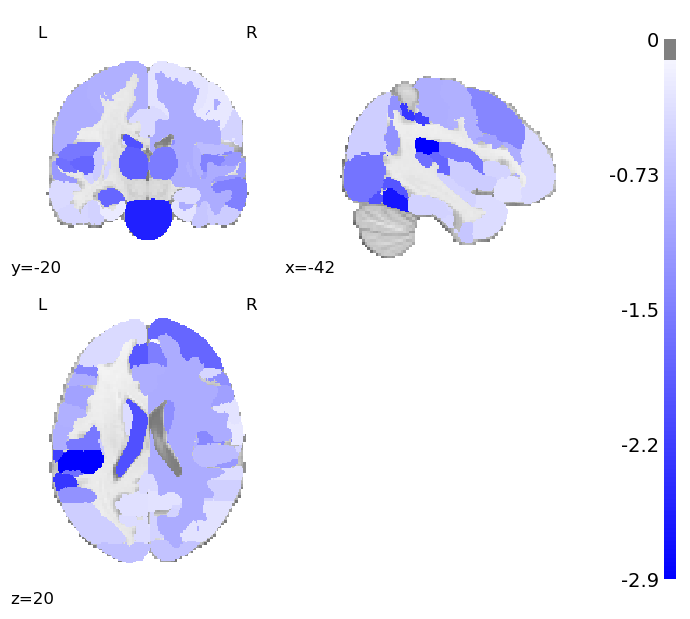

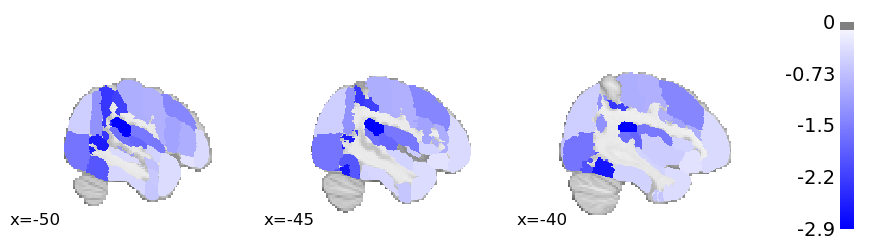

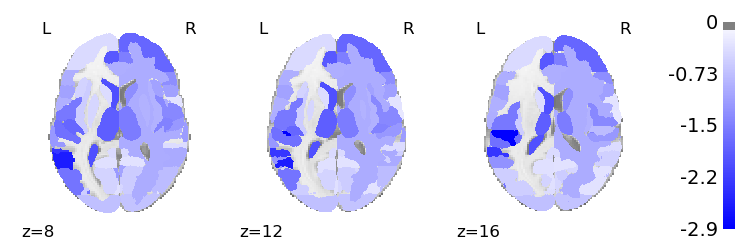

In [80]:
import numpy as np
import pandas as pd
from nilearn import image, plotting
from nilearn.input_data import NiftiLabelsMasker
mythr = 0.1

Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore-results.csv')
Dres.columns#

values=[float(i.split()[0]) for i in Dres[Dres.columns[2]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape
for i in range(1,97):
    ix = np.where(roimg2d_1==i)
    data[0, ix[1]] = values[i-1]
for j in range(97,119):
    if ((j==97) | (j==98) | (j==109) | (j==110)):
        continue #we have to skip the subcortical whole hemispher as it oveerrides the regions
    ix = np.where(roimg2d_2== (j-96))
    data[0, ix[1]] = values[j-1]
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))

plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= mythr, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= mythr, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= mythr, display_mode='z', black_bg=False, draw_cross=False)



# plotting the results - RUL

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


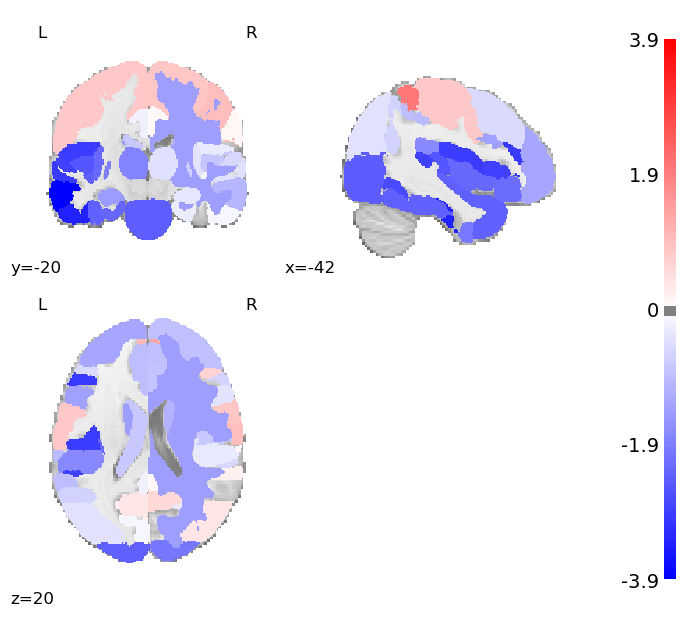

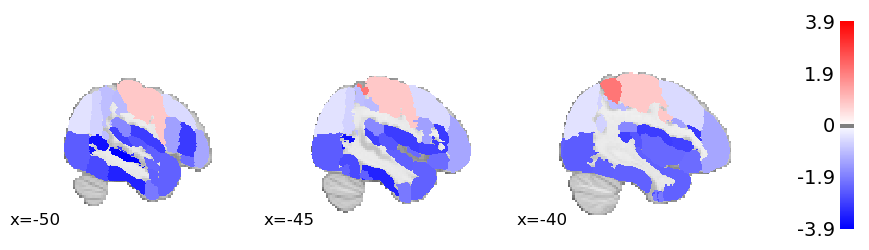

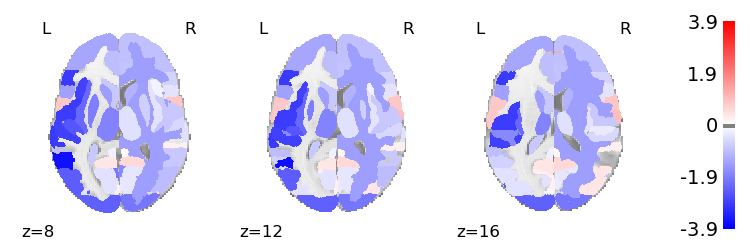

In [81]:
import numpy as np
import pandas as pd
from nilearn import image, plotting
from nilearn.input_data import NiftiLabelsMasker


Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore-results.csv')
Dres.columns#

values=[float(i.split()[0]) for i in Dres[Dres.columns[4]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape
for i in range(1,97):
    ix = np.where(roimg2d_1==i)
    data[0, ix[1]] = values[i-1]
for j in range(97,119):
    if ((j==97) | (j==98) | (j==109) | (j==110)):
        continue #we have to skip the subcortical whole hemispher as it oveerrides the regions
    ix = np.where(roimg2d_2== (j-96))
    data[0, ix[1]] = values[j-1]
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))

plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= mythr, display_mode='tiled', black_bg=False, draw_cross=False)

plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= mythr, display_mode='x', black_bg=False, draw_cross=False)

plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= mythr, display_mode='z', black_bg=False, draw_cross=False)

# plotting the results BL

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


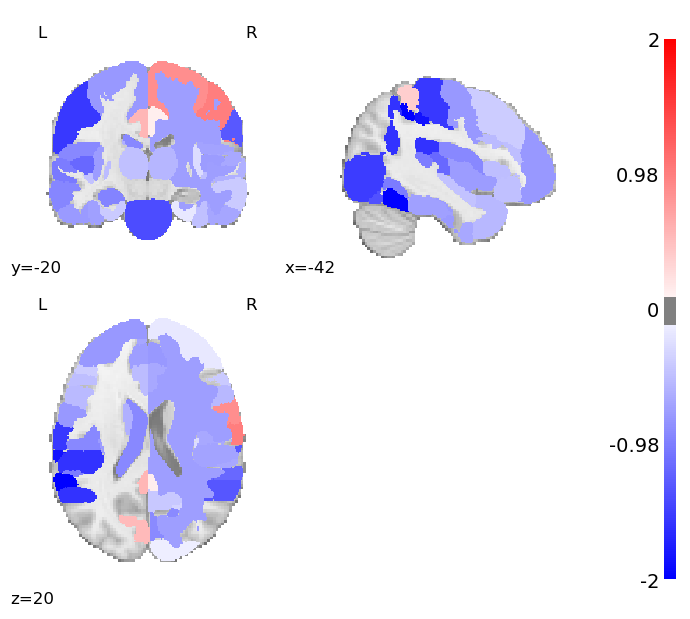

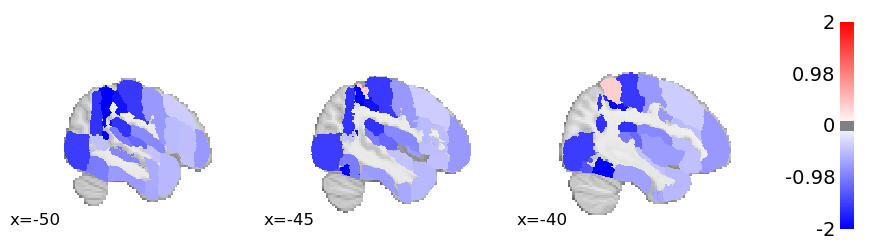

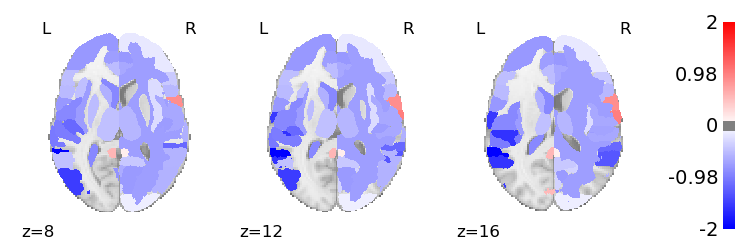

In [82]:
Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore-results.csv')
Dres.columns#

values=[float(i.split()[0]) for i in Dres[Dres.columns[8]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape
for i in range(1,97):
    ix = np.where(roimg2d_1==i)
    data[0, ix[1]] = values[i-1]
for j in range(97,119):
    if ((j==97) | (j==98) | (j==109) | (j==110)):
        continue #we have to skip the subcortical whole hemispher as it oveerrides the regions
    ix = np.where(roimg2d_2== (j-96))
    data[0, ix[1]] = values[j-1]
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))

plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= mythr, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= mythr, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= mythr, display_mode='z', black_bg=False, draw_cross=False)



# plotting the results -  switchers

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


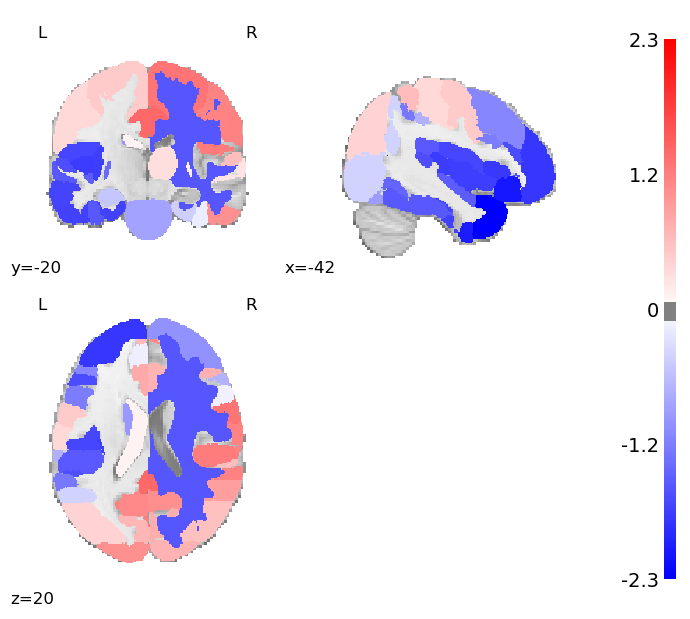

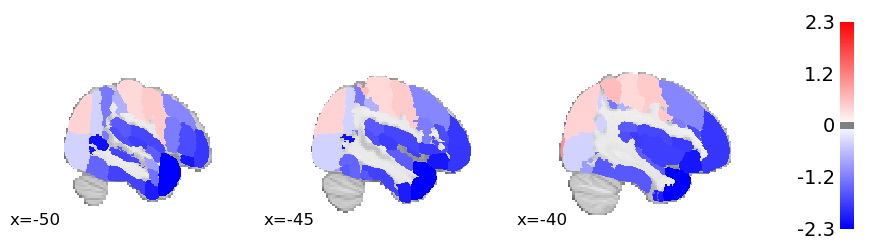

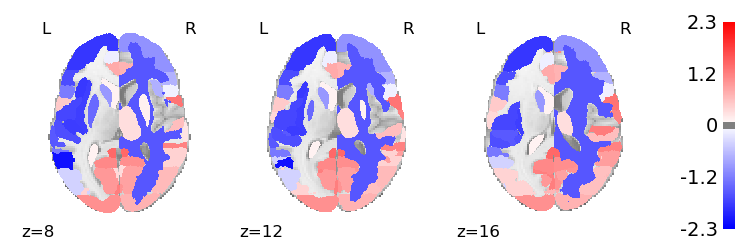

In [83]:
Dres = pd.read_csv('/analysis/Argyelan/nipype_playground/ECTman/Dore/Dore-results.csv')
Dres.columns#

values=[float(i.split()[0]) for i in Dres[Dres.columns[6]]]
len(values)

roi_img_1=image.load_img(dataset_ho.filename)
roi_img_2=image.load_img(dataset_ho_sc.filename)

roimg3d_1 =  roi_img_1.get_fdata()
roimg2d_1 = roimg3d_1.reshape([1,np.prod(roimg3d_1.shape)])

roimg3d_2 =  roi_img_2.get_fdata()
roimg2d_2 = roimg3d_2.reshape([1,np.prod(roimg3d_2.shape)])

data=np.zeros([1, np.prod(roi_img_1.shape)])
               
data.shape
for i in range(1,97):
    ix = np.where(roimg2d_1==i)
    data[0, ix[1]] = values[i-1]
for j in range(97,119):
    if ((j==97) | (j==98) | (j==109) | (j==110)):
        continue #we have to skip the subcortical whole hemispher as it oveerrides the regions
    ix = np.where(roimg2d_2== (j-96))
    data[0, ix[1]] = values[j-1]
new_img = image.new_img_like(roi_img_1, data.reshape(roi_img_1.shape))

plotting.plot_stat_map(new_img,  cut_coords=[-42,-20,20],cmap=plt.cm.bwr,  threshold= mythr, display_mode='tiled', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[-50,-45,-40],cmap=plt.cm.bwr,  threshold= mythr, display_mode='x', black_bg=False, draw_cross=False)
plotting.plot_stat_map(new_img,  cut_coords=[8,12,16],cmap=plt.cm.bwr,  threshold= mythr, display_mode='z', black_bg=False, draw_cross=False)

